***Color manual***

<div class="alert alert-block alert-success">
<b>Green - Libraries</b>
</div>

<div class="alert alert-block alert-info">
<b>Blue - Information</b>
</div>

<div class="alert alert-block alert-danger">
<b>Red - Problems</b>
</div>

***

<div class="alert alert-block alert-success">
<b>Import libraries</b>
</div>

In [9]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from pandas_datareader import data

%matplotlib inline
sns.set_style('white')

<div class="alert alert-block alert-info">
<b>Load the stocks historical data, transform in yearly data and get percentage return</b>
</div>

In [2]:
stock1 = data.DataReader('MSFT', 'yahoo', start = '2018/01/01', end = '2019/12/31')
stock1 = stock1.resample('Y').last().dropna().pct_change().dropna()

stock2 = data.DataReader('AAPL', 'yahoo', start = '2018/01/01', end = '2019/12/31')
stock2 = stock2.resample('Y').last().dropna().pct_change().dropna()

stock3 = data.DataReader('AMZN', 'yahoo', start = '2018/01/01', end = '2019/12/31')
stock3 = stock3.resample('Y').last().dropna().pct_change().dropna()

<div class="alert alert-block alert-info">
<b>Percentage return of the market index S&P 500 with GSPC</b>
</div>

In [3]:
Rm = data.DataReader('^GSPC', 'yahoo', start = '2018/01/01', end = '2019/12/31')
Rm = Rm.resample('Y').last().pct_change().dropna()
Rm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,0.287928,0.293702,0.286618,0.288781,-0.159477,0.288781


<div class="alert alert-block alert-info">
<b>Percentage return of risk free investment with DGS10 = One Month Treasury Constant Maturity Rate</b>
</div>

In [4]:
Rf = data.DataReader('DGS1MO', 'fred', start = '2018/01/01', end = '2019/12/31')
Rf = Rf.resample('Y').last().pct_change().dropna()
Rf = Rf/100
Rf.head()

,DGS1MO
DATE,
2019-12-31,-0.003934


<div class="alert alert-block alert-info">
<b>$\beta$ from stocks and market from the same timeline</b>
</div>

In [5]:
market_beta = 1

stock1_beta = 0.9960

stock2_beta = 1.3522

stock3_beta = 1.4519

beta_list = [market_beta, stock1_beta, stock2_beta, stock3_beta]

<div class="alert alert-block alert-info">
<b>CAPM % return from stocks and market from the same timeline</b>
</div>

In [6]:
market_capm = (Rm['Adj Close']*market_beta).dropna()

stock1_capm = (Rf['DGS1MO'] + stock1_beta * (Rm['Adj Close'] - Rf['DGS1MO'])).dropna()

stock2_capm = (Rf['DGS1MO'] + stock2_beta * (Rm['Adj Close'] - Rf['DGS1MO'])).dropna()

stock3_capm = (Rf['DGS1MO'] + stock3_beta * (Rm['Adj Close'] - Rf['DGS1MO'])).dropna()

capm_list = [market_capm, stock1_capm, stock2_capm, stock3_capm]

<div class="alert alert-block alert-info">
<b>Expected return from stocks and market from the same timeline</b>
</div>

In [7]:
market_return = Rm['Adj Close']

stock1_return = stock1['Adj Close']

stock2_return = stock2['Adj Close']

stock3_return = stock3['Adj Close']

exp_returns = [market_return, stock1_return, stock2_return, stock3_return]

<div class="alert alert-block alert-info">
<b>Security Market Line plot</b>
</div>

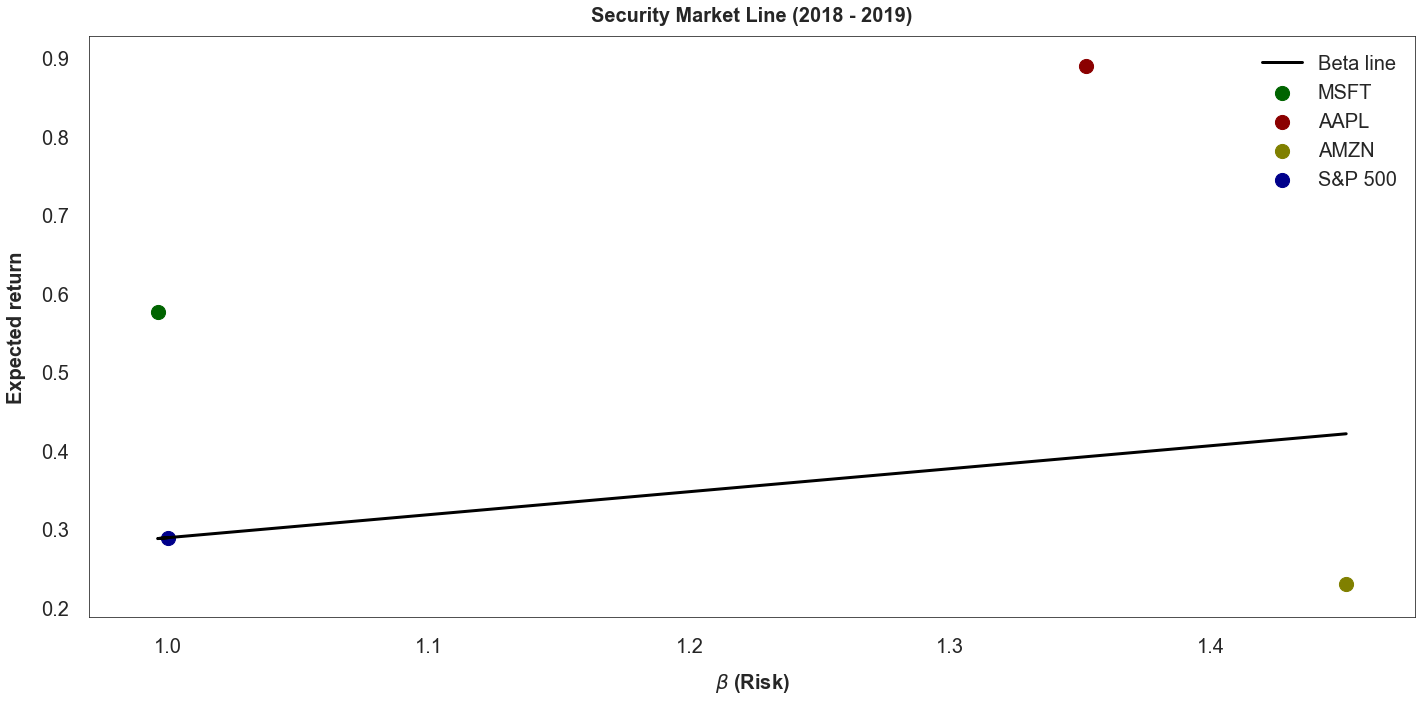

In [8]:
plt.figure(figsize = (20,10))
plt.rc('font', weight = 'normal')
plt.title('Security Market Line (2018 - 2019)', weight = 'bold', fontsize = 20, pad = 15)
plt.xlabel(r'$\beta$ (Risk)', weight = 'bold', fontsize = 20, labelpad = 15)
plt.ylabel('Expected return', weight = 'bold', fontsize = 20,  labelpad = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)                                                                              
plt.rc('font', size = 15)
plt.plot(beta_list, capm_list, label = 'Beta line', color = 'black', linewidth = 3)
plt.scatter(stock1_beta, stock1['Adj Close'], label = 'MSFT', color = 'darkgreen', s = 200)
plt.scatter(stock2_beta, stock2['Adj Close'], label = 'AAPL', color = 'darkred', s = 200)
plt.scatter(stock3_beta, stock3['Adj Close'], label = 'AMZN', color = 'olive', s = 200)
plt.scatter(market_beta, Rm['Adj Close'], label = 'S&P 500',  color = 'darkblue', s = 200)
plt.legend(loc = 'upper right', prop = {'size':20}, frameon = False)
plt.tight_layout() 
plt.show()